In [19]:
'''Code created for Personal image and non personal image classificatio
   Dataset - Credit cards and non personal images
   Project - Goefencing EB project
   Company - IBM'''


import keras as ks                                            #For convolution neural network deep learning library
import numpy as np                                            #array library
import matplotlib.pyplot as plt                               #plotting lbrary
from keras.preprocessing.image import ImageDataGenerator      #Used for data augmentation
from keras.models import Sequential                           #Import Sequential model from Keras to stack the layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

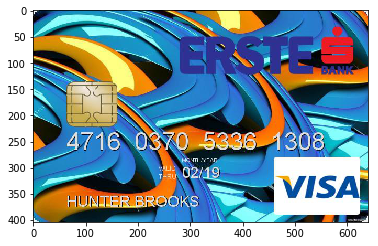

In [20]:
img = plt.imread('C:/Users/IBM_ADMIN/Desktop/image/samplecard/temp-1.jpg')
plt.imshow(img);

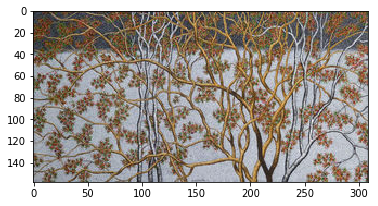

In [21]:
img = plt.imread('C:/Users/IBM_ADMIN/Desktop/image/clean dataset/train/non personal/15.jpg')
plt.imshow(img);

In [22]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'C:/Users/IBM_ADMIN/Desktop/image/clean dataset/train'
validation_data_dir = 'C:/Users/IBM_ADMIN/Desktop/image/clean dataset/validation'
 
nb_train_samples = 1100
nb_validation_samples = 400
epochs = 20
batch_size = 16

input_shape = (img_width, img_height, 3)
 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()       #The model architecture

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)             0         
__________

In [25]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2238 images belonging to 2 classes.
Found 881 images belonging to 2 classes.


In [26]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('new_weight.h5')  # save your weights after training or during training

Epoch 1/50
  9/125 [=>............................] - ETA: 1:30 - loss: 1.0808 - acc: 0.5972

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\PIL\Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


125/125 [==============================] - 122s 976ms/step - loss: 0.3777 - acc: 0.8514 - val_loss: 0.0792 - val_acc: 0.9762
Epoch 2/50
125/125 [==============================] - 118s 941ms/step - loss: 0.1736 - acc: 0.9434 - val_loss: 0.1305 - val_acc: 0.9637
Epoch 3/50
125/125 [==============================] - 118s 941ms/step - loss: 0.1205 - acc: 0.9604 - val_loss: 0.2256 - val_acc: 0.9537
Epoch 4/50
125/125 [==============================] - 113s 905ms/step - loss: 0.1460 - acc: 0.9600 - val_loss: 0.0596 - val_acc: 0.9825
Epoch 5/50
125/125 [==============================] - 115s 921ms/step - loss: 0.1201 - acc: 0.9629 - val_loss: 0.1739 - val_acc: 0.9625
Epoch 6/50
125/125 [==============================] - 110s 884ms/step - loss: 0.0990 - acc: 0.9685 - val_loss: 0.2474 - val_acc: 0.9325
Epoch 7/50
125/125 [==============================] - 117s 936ms/step - loss: 0.0992 - acc: 0.9709 - val_loss: 0.2202 - val_acc: 0.9450
Epoch 8/50
125/125 [==============================] - 113s 

In [9]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


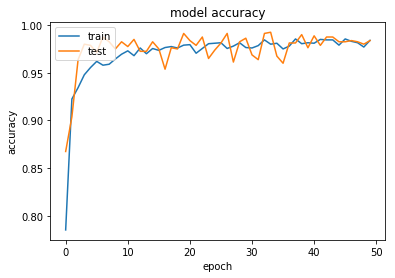

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

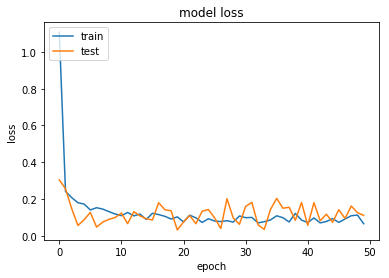

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
print(model_json)